# Execution Trace
- **Start Timestamp (UTC)**: 2025-01-17T06:46:45.967092+00:00
- **OS**: Linux 5.15.0-125-generic #135~20.04.1-Ubuntu SMP Mon Oct 7 13:56:22 UTC 2024
- **Machine**: x86_64
- **Python Info**: 3.12.4-final0
- **Python Environment Hash**: 254ed744c6afa6cb7a82cb312f75f9fcd1c4da2c13d780212e30fa7339309c54
- **CAPTCHA**:

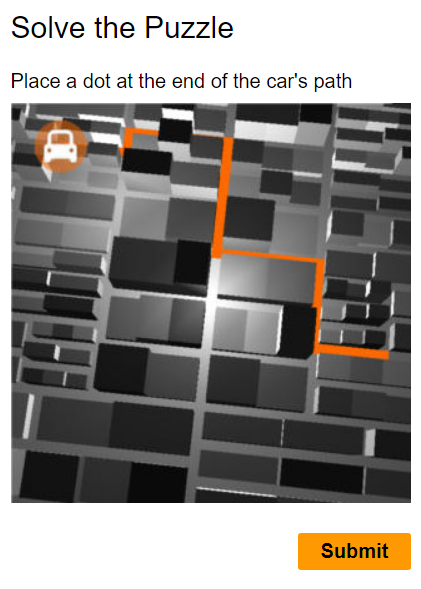

## Objective Identification

In [ ]:
def stage1(frames):
    # Step 1: Provide one-sentence visual description of each frame.
    describe(0, "A text prompt instructs to 'Place a dot at the end of the car's path' with a 'Submit' button below.")
    describe(1, "A map-like grid with a car icon at the start and an orange path leading to an endpoint.")

    # Step 2: Identify the relationships between frames.
    relate(0, 1, "Frame 0 provides instructions for interacting with the map in Frame 1.")

    # Step 3: Identify the sequential events and the final visual criteria.
    objective("Click on the endpoint of the orange path in the map grid and then press the 'Submit' button to complete the task.")

## Structure Abstraction

In [ ]:
def stage2(frames):
    frame_0 = frames[0]
    submit_button = frame_0.get_element(position='down', details="orange button with 'Submit' text")
    submit_button.set_element_as(interactable='NEXT')
    frame_1 = frames[1]
    frame_1.set_frame_as(interactable='POINTABLE')
    return frames

## Solution Composition

In [ ]:
def stage3(frames):
    # Step 1: Annotate the keypoints on the 3D grid map in Frame 1
    keypoint_image = frames[1].show_keypoints(region="all")

    # Step 2: Ask a question to identify the general area of the end of the orange path
    initial_answer = ask([keypoint_image], "Which keypoint is at the end of the colored path?", answer_type="int")

    # Step 3: Get the keypoint corresponding to the initial answer
    initial_keypoint = frames[1].get_keypoint(id=initial_answer[0])

    # Step 4: Narrow down the search space by showing neighbors of the initial keypoint
    neighbour_image = initial_keypoint.show_neighbours()

    # Step 5: Refine the answer by asking again within the narrowed-down space
    refined_answer = ask([neighbour_image], "Which keypoint is at the end of the colored path?", answer_type="int")

    # Step 6: Get the refined keypoint corresponding to the refined answer
    endpoint = initial_keypoint.get_neighbour(id=refined_answer[0])

    # Step 7: Place a dot at the identified keypoint
    point(to=endpoint)

    # Step 8: Click the 'Submit' button in Frame 0
    submit_button = frames[0].get_interactable(id=0)
    click(target=submit_button)

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: Which keypoint is at the end of the colored path?
Output a list of numbers for each image.
You should follow the format `answer(numbers=[1, 2, ...])` to answer the question.
## Guidelines
1. Imagine the car is going on a journey through a path.
2. Follow the colored path starting from the car icon, where does the car end at?
3. If there is no car icon, find the edge of the colored path.
'''

Image 0
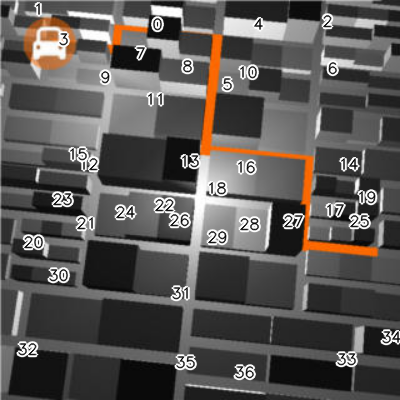

In [ ]:
IMAGES = 1

In [ ]:
RESPONSE = '''
The colored path starts at the car icon (near keypoint 3) and follows the orange path. The path ends at keypoint **25**.

Answer: `answer(numbers=[25])`
'''
TIME = 1.3741445220075548
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 599
PROMPT_TOKENS = 558
COMPLETION_TOKENS = 41

---

In [ ]:
PROMPT = '''
## Objective
Given the list of images, answer the question: Which keypoint is at the end of the colored path?
Output a list of numbers for each image.
You should follow the format `answer(numbers=[1, 2, ...])` to answer the question.
## Guidelines
1. Imagine the car is going on a journey through a path.
2. Follow the colored path starting from the car icon, where does the car end at?
3. If there is no car icon, find the edge of the colored path.
'''

Image 0
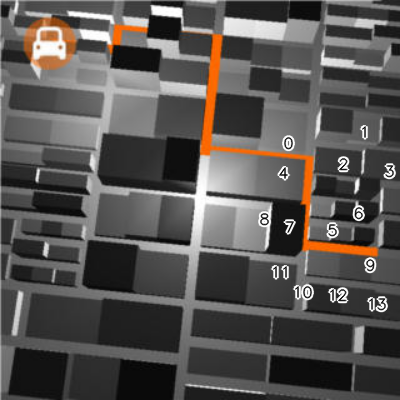

In [ ]:
IMAGES = 1

In [ ]:
RESPONSE = '''
The colored path starts at the car icon and ends at keypoint **9**.

answer(numbers=[9])
'''
TIME = 1.4018766791559756
FINGERPRINT = fp_60a3f2dc65
TOTAL_TOKENS = 581
PROMPT_TOKENS = 558
COMPLETION_TOKENS = 23

---